# Exercise - Audio Processing

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:** Rizki Alfariz Ramadhan  
**NIM:** 122140061  

---

## Deskripsi Tugas

Tugas ini dirancang untuk menguji pemahaman mahasiswa terhadap konsep-konsep fun-damental dalam pemrosesan audio digital, termasuk manipulasi sinyal audio, ﬁltering,
pitch shifting, normalisasi, dan teknik remix audio. Mahasiswa diharapkan dapat men-
erapkan teori yang telah dipelajari dalam praktik langsung menggunakan Python dan
pustaka pemrosesan audio.

---

## Soal 1: Rekaman dan Analisis Suara Multi-Level

### 1.A Visualisasi waveform dan spectogram audio 1

Sample rate: 22050 Hz


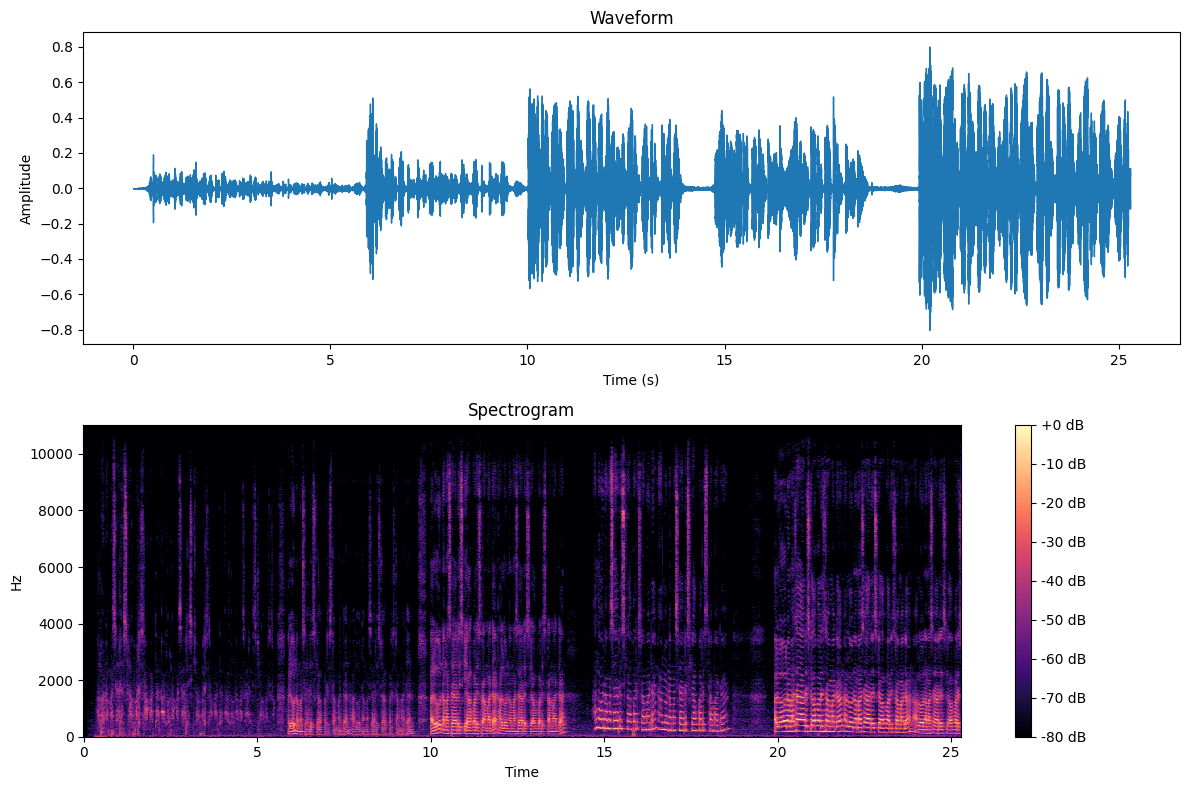

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

base_dir = Path.cwd() 
audio_path = base_dir / "data" / "audio1.wav"

y, sr = librosa.load(audio_path)
print(f"Sample rate: {sr} Hz")

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
D = librosa.amplitude_to_db(abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

plt.tight_layout()
plt.show()

#### Penjelasan
Visualisasi waveform dan spektrogram menunjukkan peningkatan intensitas suara yang jelas di setiap segmen 5 detik. Pada waveform, amplitudo awal kecil menandakan suara berbisik, meningkat stabil pada suara normal, lalu membesar saat suara keras. Amplitudo tetap tinggi pada suara cempreng dan mencapai puncak saat berteriak. Pada spektrogram, segmen berbisik memiliki energi rendah dan warna gelap, segmen normal lebih terang dengan frekuensi rendah hingga menengah, suara keras menunjukkan sebaran energi yang lebih luas, suara cempreng menonjol pada frekuensi tinggi, dan segmen teriakan menampilkan energi paling kuat dan terang di berbagai frekuensi. 

### 1.B Resampling audio1

Sample rate setelah resampling: 16000 Hz


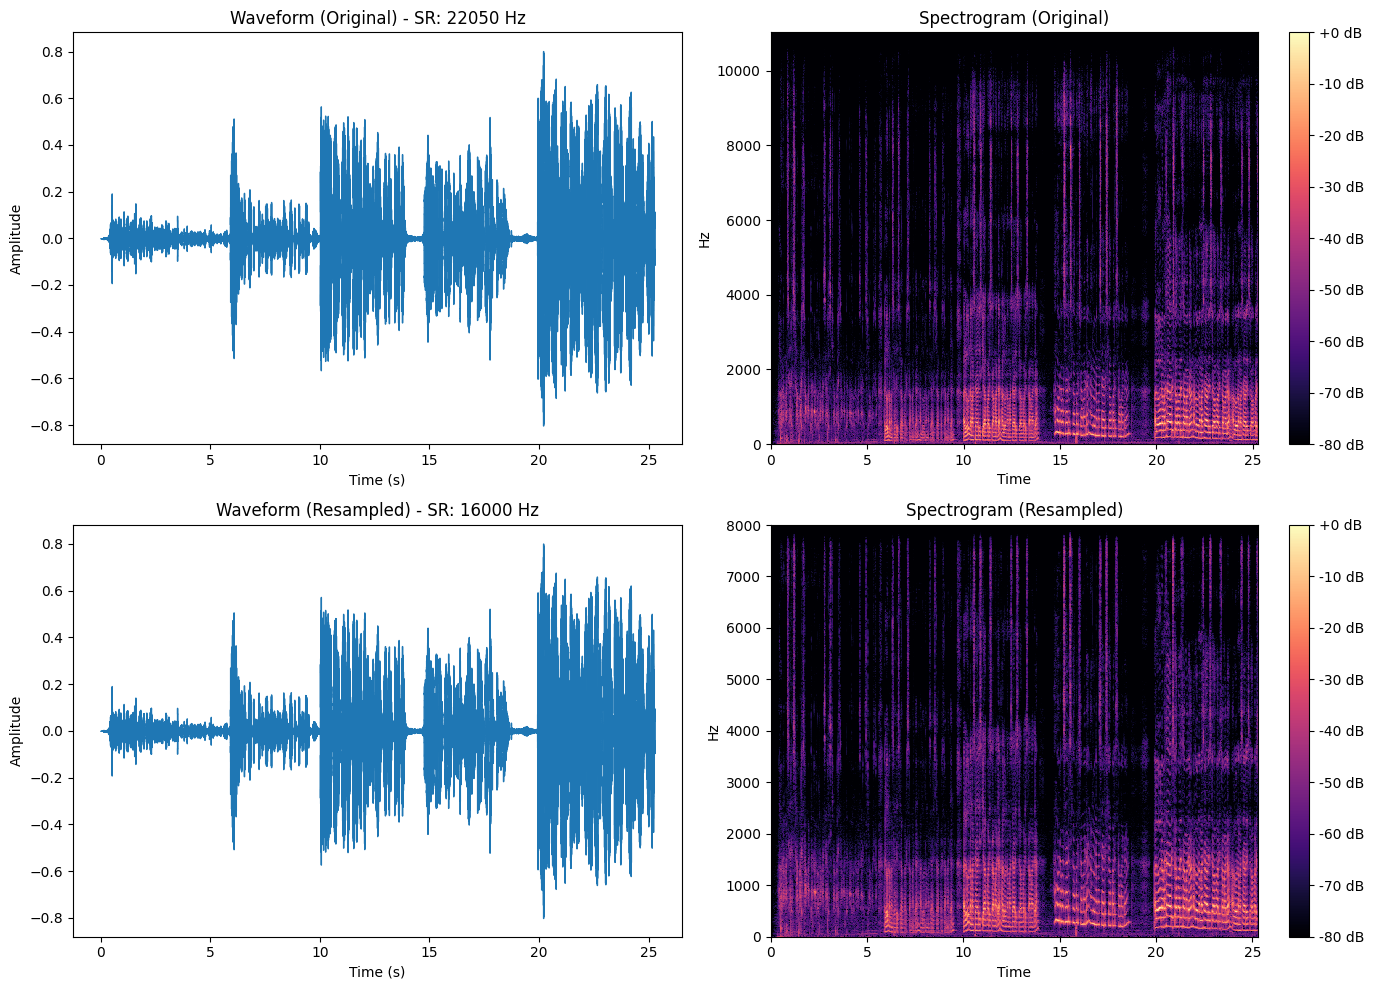

In [9]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

target_sr = 16000
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=target_sr)
sf.write("data/audio1_resampled.wav", y_resampled, target_sr)
data, sr_audio_resample = sf.read("data/audio1_resampled.wav")
print(f"Sample rate setelah resampling: {sr_audio_resample} Hz")


plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
librosa.display.waveshow(y, sr=sr)
plt.title(f'Waveform (Original) - SR: {sr} Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
D_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D_orig, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Original)')

plt.subplot(2, 2, 3)
librosa.display.waveshow(y_resampled, sr=target_sr)
plt.title(f'Waveform (Resampled) - SR: {target_sr} Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 4)
D_resamp = librosa.amplitude_to_db(np.abs(librosa.stft(y_resampled)), ref=np.max)
librosa.display.specshow(D_resamp, sr=target_sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Resampled)')

plt.tight_layout()
plt.show()

#### Penjelasan
Teknik yang digunakan adalah Downsampling, dimana menurunkan sample rate dari audio. Sample rate dari audio1 adalah 22050 lalu diturunkan menjadi 16000 sesuai dengan sample rate umum voice yaitu 16000. Sebelum melakukan downsampling perlu menerapkan lowpass filter untuk mengatasi aliasing, librosa.resample sudah menerapkan lowpass filter sebelum downsampling. Perbandingan hasil visualisasi waveform dan spektrogram antara audio original dan audio setelah resampling menunjukkan adanya perubahan kualitas suara yang juga terdengar secara subjektif. Pada waveform, bentuk gelombang sebelum dan sesudah resampling terlihat serupa, tetapi ketika didengarkan distribusi amplitudo menjadi lebih seimbang, mencerminkan suara yang terdengar lebih “balance” antara kanal kanan dan kiri yang sebelumnya hanya suara dominan di kanal kanan. Pada spektrogram, energi frekuensi sebelum dan sesudah resampling terlihat serupa, ketika didengarkan energi frekuensi pada hasil resampling tampak lebih merata dan bersih dengan noise pada frekuensi tinggi yang lebih teredam dibandingkan audio original. Untuk durasi, audio original dengan audio resample tetap sama.

---

## Soal 2: Noise Reduction dengan Filtering

### 2.A Filter equalisasi (high-pass, low-pass, dan band-pass)

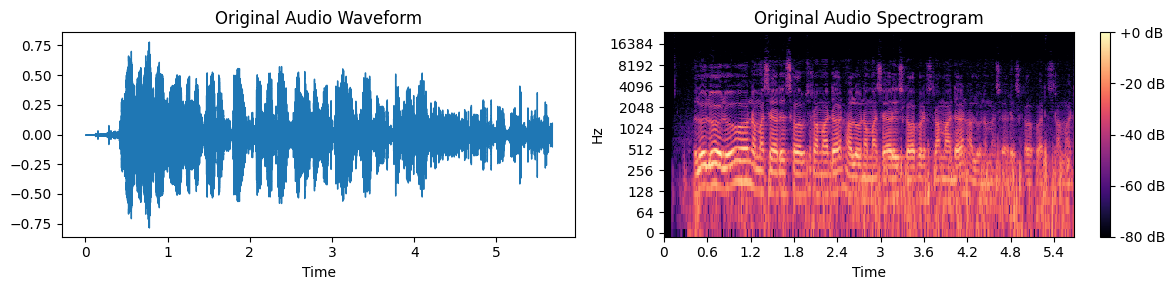

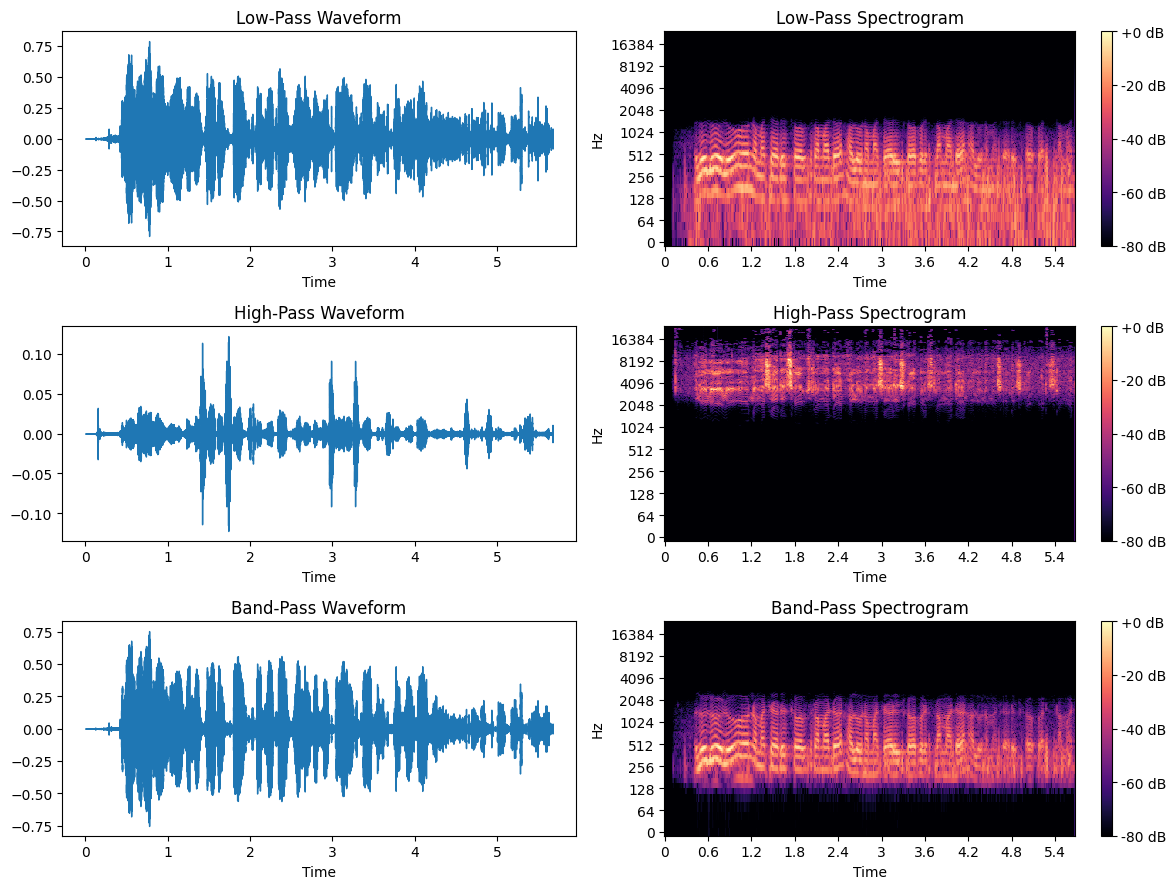

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import butter, filtfilt
from pathlib import Path

base_dir = Path.cwd()
audio_path = base_dir / "data" / "audio2.wav"

y, sr = librosa.load(audio_path, sr=None)

fig, ax = plt.subplots(1, 2, figsize=(12, 3))
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set_title("Original Audio Waveform")
S = np.abs(librosa.stft(y))
S_db = librosa.amplitude_to_db(S, ref=np.max)
img = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', ax=ax[1], cmap='magma')
ax[1].set_title("Original Audio Spectrogram")
fig.colorbar(img, ax=ax[1], format="%+2.0f dB")
plt.tight_layout()
plt.show()

def apply_filter(y, sr, btype, cutoff):
    nyq = 0.5 * sr
    if btype == 'band':
        low, high = np.array(cutoff) / nyq
        b, a = butter(5, [low, high], btype=btype)
    else:
        normal_cutoff = cutoff / nyq
        b, a = butter(5, normal_cutoff, btype=btype)
    return filtfilt(b, a, y)

low_pass = apply_filter(y, sr, 'low', 1050)
high_pass = apply_filter(y, sr, 'high', 3000)
band_pass = apply_filter(y, sr, 'band', (200, 2000))

sf.write("data/audio_lowpass.wav", low_pass, sr)
sf.write("data/audio_highpass.wav", high_pass, sr)
sf.write("data/audio_bandpass.wav", band_pass, sr)

fig, axes = plt.subplots(3, 2, figsize=(12, 9))
for i, (data, title) in enumerate(zip(
    [low_pass, high_pass, band_pass],
    ["Low-Pass", "High-Pass", "Band-Pass"]
)):
    librosa.display.waveshow(data, sr=sr, ax=axes[i, 0])
    axes[i, 0].set_title(f"{title} Waveform")
    S = np.abs(librosa.stft(data))
    S_db = librosa.amplitude_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', ax=axes[i, 1], cmap='magma')
    axes[i, 1].set_title(f"{title} Spectrogram")
    fig.colorbar(img, ax=axes[i, 1], format="%+2.0f dB")

plt.tight_layout()
plt.show()

### 2.B Eksperimen dengan berbagai nilai frekuensi cutoﬀ (misalnya 500 Hz, 1000Hz, 2000 Hz)

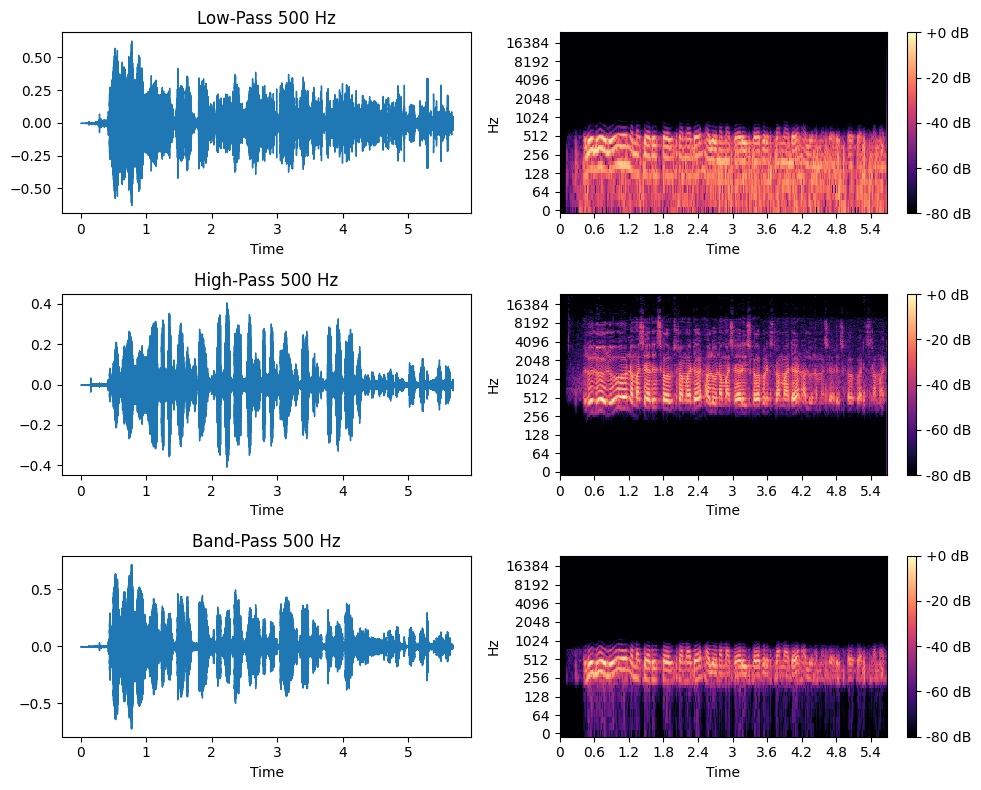

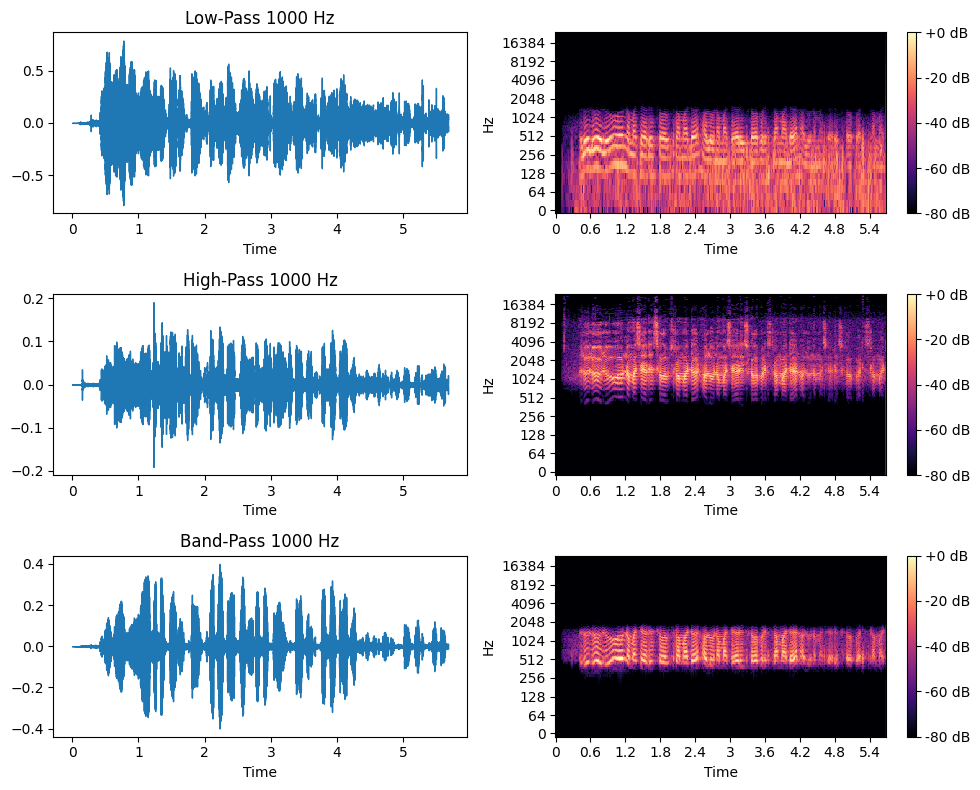

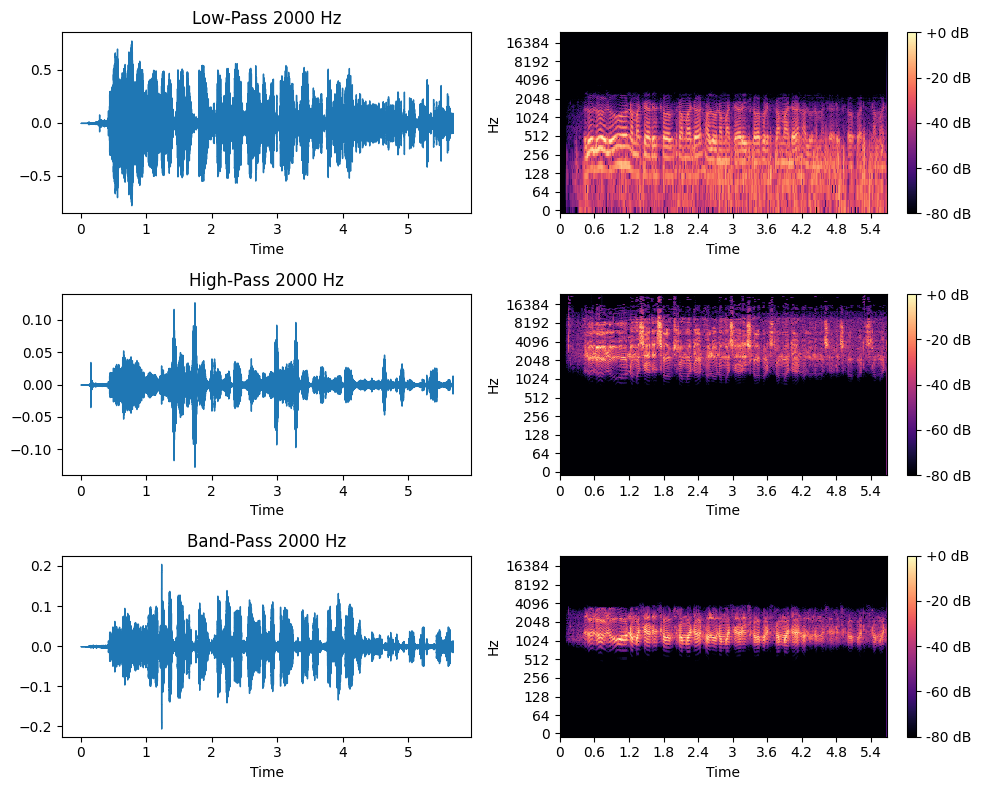

In [4]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import butter, filtfilt
from pathlib import Path

base_dir = Path.cwd()
audio_path = base_dir / "data" / "audio2.wav"
y, sr = librosa.load(audio_path, sr=None)

def butter_filter(y, sr, btype, cutoff):
    nyq = 0.5 * sr
    if btype == 'band':
        b, a = butter(5, [c / nyq for c in cutoff], btype='band')
    else:
        b, a = butter(5, cutoff / nyq, btype=btype)
    return filtfilt(b, a, y)

cutoff_values = [500, 1000, 2000]
for cutoff in cutoff_values:
    filters = {
        'low': cutoff,
        'high': cutoff,
        'band': (cutoff / 2, cutoff * 1.5)
    }
    fig, axes = plt.subplots(3, 2, figsize=(10, 8))
    for i, (ftype, cval) in enumerate(filters.items()):
        y_f = butter_filter(y, sr, ftype, cval)
        sf.write(f"data/audio_{ftype}pass_{cutoff}Hz.wav", y_f, sr)
        librosa.display.waveshow(y_f, sr=sr, ax=axes[i, 0])
        axes[i, 0].set_title(f"{ftype.capitalize()}-Pass {cutoff} Hz")
        S_db = librosa.amplitude_to_db(np.abs(librosa.stft(y_f)), ref=np.max)
        img = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', ax=axes[i, 1], cmap='magma')
        fig.colorbar(img, ax=axes[i, 1], format="%+2.0f dB")
    plt.tight_layout()
    plt.show()

### Penjelasan

**– Jenis noise yang muncul pada rekaman Anda**  
Jenis noise yang ada pada audio adalah *noise eksternal*, di mana saat saya memulai perekaman audio, saya berada di dekat kipas angin sehingga suara dari kipas masuk ke dalam rekaman.  

**– Filter yang paling efektif untuk mengurangi noise tersebut**  
Filter yang paling efektif untuk mengurangi noise pada audio ini adalah **bandpass filter**, karena mampu memotong frekuensi rendah dan tinggi yang mengandung noise.  

**– Nilai cutoff yang memberikan hasil terbaik**  
- **Bandpass:** 1000 Hz — noise berkurang cukup signifikan, tetapi suara menjadi sedikit lebih nyaring.  
- **Lowpass:** 1000 Hz — noise lebih sedikit terdengar, tetapi suara terdengar lebih terpendam.  
- **Highpass:** 500 Hz — menghasilkan suara lebih nyaring namun tetap mengurangi noise secara cukup baik.  

**– Kualitas suara (kejelasan ucapan) setelah proses filtering**  
- **Bandpass:** Suara masih jelas dan noise berkurang secara efektif.  
- **Highpass:** Suara sangat nyaring, perlu menaikkan volume agar ucapan terdengar jelas.  
- **Lowpass:** Suara terdengar terpendam dan noise masih sedikit terdengar.

---

## Soal 3: Pitch Shifting dan Audio Manipulation

### 3.A  Pitch shifting pada rekaman suara Soal 1 untuk membuat suara terdengarseperti chipmunk

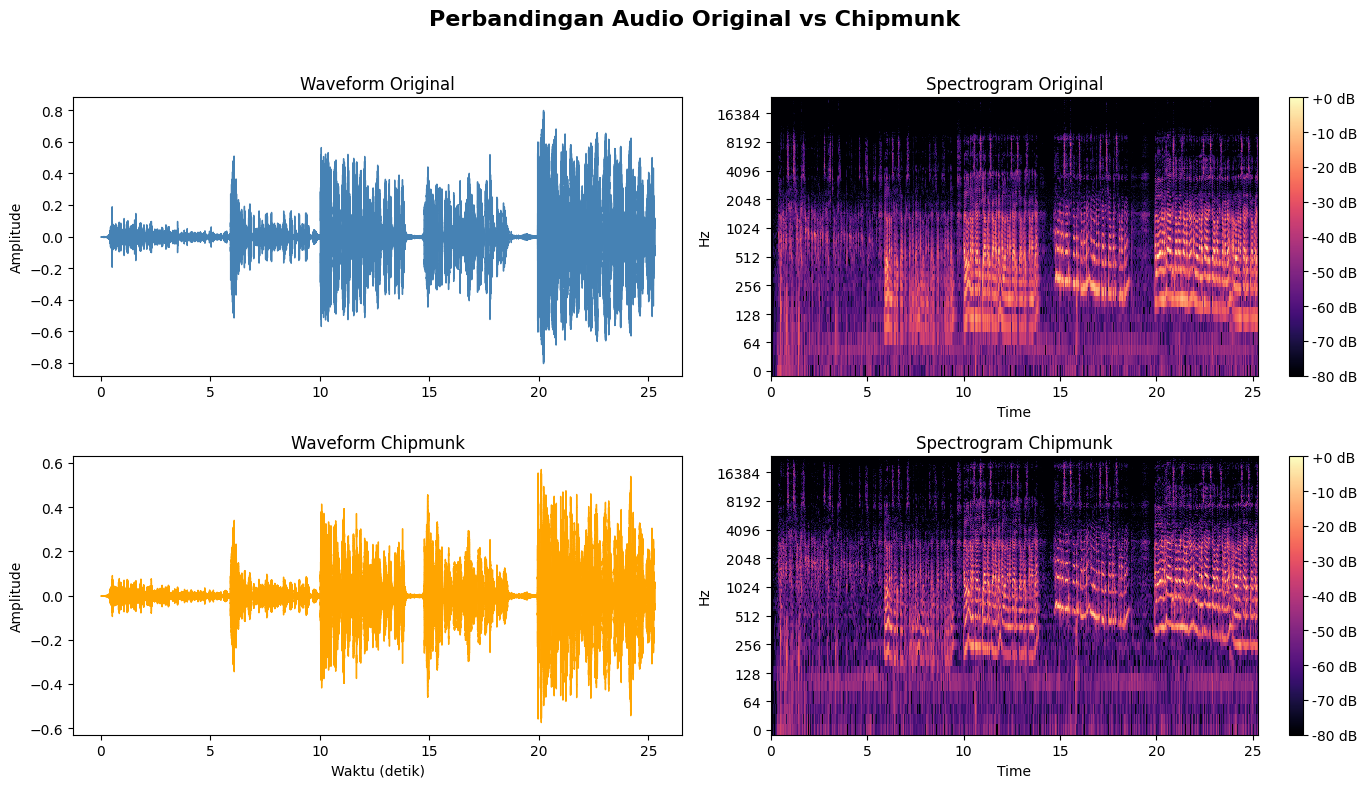

In [13]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import soundfile as sf
from pathlib import Path

base_dir = Path.cwd()
audio_path = base_dir / "data" / "audio1.wav"

y, sr = librosa.load(audio_path, sr=None)

y_chipmunk = librosa.effects.pitch_shift(y, sr=sr, n_steps=13)
sf.write("data/audio_chipmunk.wav", y_chipmunk, sr)

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle("Perbandingan Audio Original vs Chipmunk", fontsize=16, fontweight="bold")

librosa.display.waveshow(y, sr=sr, ax=axes[0, 0], color="steelblue")
axes[0, 0].set_title("Waveform Original", fontsize=12)
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("Amplitude")

S = np.abs(librosa.stft(y))
S_db = librosa.amplitude_to_db(S, ref=np.max)
img1 = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', ax=axes[0, 1], cmap='magma')
axes[0, 1].set_title("Spectrogram Original", fontsize=12)
fig.colorbar(img1, ax=axes[0, 1], format="%+2.f dB")

librosa.display.waveshow(y_chipmunk, sr=sr, ax=axes[1, 0], color="orange")
axes[1, 0].set_title("Waveform Chipmunk", fontsize=12)
axes[1, 0].set_xlabel("Waktu (detik)")
axes[1, 0].set_ylabel("Amplitude")

S2 = np.abs(librosa.stft(y_chipmunk))
S2_db = librosa.amplitude_to_db(S2, ref=np.max)
img2 = librosa.display.specshow(S2_db, sr=sr, x_axis='time', y_axis='log', ax=axes[1, 1], cmap='magma')
axes[1, 1].set_title("Spectrogram Chipmunk", fontsize=12)
fig.colorbar(img2, ax=axes[1, 1], format="%+2.f dB")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Penjelasan
Proses pitch shifting dilakukan menggunakan fungsi librosa.effects.pitch_shift(y, sr=sr, n_steps=13) dari library Librosa. Pada proses ini, sinyal audio asli (y) dengan frekuensi sampling (sr) diubah dengan menaikkan nada sebesar 13 semitone, yang berarti lebih dari satu oktaf (1 oktaf = 12 semitone). Peningkatan sebesar ini menyebabkan seluruh komponen frekuensi suara menjadi lebih tinggi sehingga menghasilkan efek suara yang tajam dan ringan menyerupai karakter chipmunk. Secara visual, pada waveform terlihat perubahan amplitudo yang sedikit berbeda karena adanya pergeseran spektrum frekuensi ke arah yang lebih tinggi, sementara pada spectrogram terlihat bahwa frekuensi berpindah ke area atas (frekuensi tinggi). Perubahan pitch ini membuat suara terdengar lebih nyaring dan tajam, namun juga bisa membuat suara menjadi kurang jernih atau tidak alami karena karakter suara aslinya ikut berubah.

### 3.B Pembuatan 2 buah pitch tinggi +7 dan +12

In [14]:
import librosa
import soundfile as sf
from pathlib import Path

base_dir = Path.cwd()
audio_path = base_dir / "data" / "audio1.wav"

y, sr = librosa.load(audio_path, sr=None)

y_pitch7 = librosa.effects.pitch_shift(y, sr=sr, n_steps=7)
y_pitch12 = librosa.effects.pitch_shift(y, sr=sr, n_steps=12)

sf.write("data/audio_pitch+7.wav", y_pitch7, sr)
sf.write("data/audio_pitch+12.wav", y_pitch12, sr)

### 3.C Penggabungan 2 buah pitch menjadi 1 file audio

In [21]:
import soundfile as sf
import numpy as np
from pathlib import Path

base_dir = Path.cwd()
audio1_path = base_dir / "data" / "audio_pitch+7.wav"
audio2_path = base_dir / "data" / "audio_pitch+12.wav"

y1, sr1 = sf.read(audio1_path)
y2, sr2 = sf.read(audio2_path)

m = min(len(y1), len(y2))
y = (y1[:m] + y2[:m])
y /= np.max(np.abs(y))

sf.write(base_dir / "data" / "audio_chipmunk_mix.wav", y, sr1)

---

## Soal 4: Audio Processing Chain

### 4.A Melakukan processing rekaman yang sudah di pitch pada soal 3

In [18]:
import librosa
import numpy as np
import soundfile as sf
from scipy.signal import butter, filtfilt
from pathlib import Path

base_dir = Path.cwd()
input_path = base_dir / "data" / "audio_chipmunk.wav"
output_path = base_dir / "data" / "audio_chipmunk_processed.wav"

y, sr = librosa.load(input_path, sr=None)

def eq(y, sr):
    b, a = butter(4, [300/(0.5*sr), 6000/(0.5*sr)], btype='band')
    return filtfilt(b, a, y)

def gain_fade(y):
    fade = np.linspace(0.8, 1.0, len(y))
    return y * 1.2 * fade

def normalize(y):
    return y / np.max(np.abs(y)) if np.max(np.abs(y)) > 0 else y

def compress(y, threshold=0.2, ratio=4):
    return np.where(
        np.abs(y) > threshold,
        np.sign(y) * (threshold + (np.abs(y) - threshold)/ratio),
        y
    )

def noise_gate(y, gate=0.02):
    return np.where(np.abs(y) < gate, 0, y)

def trim_silence(y, threshold=0.01):
    idx = np.where(np.abs(y) > threshold)[0]
    return y[idx[0]:idx[-1]] if len(idx) > 0 else y

y = eq(y, sr)
y = gain_fade(y)
y = normalize(y)
y = compress(y)
y = noise_gate(y)
y = trim_silence(y)

y = normalize(y)

sf.write(output_path, y, sr)
print(f"Audio processed disimpan di: {output_path}")

Audio processed disimpan di: e:\KIKI\MULMED\Worksheet4\data\audio_chipmunk_processed.wav


#### 4.B Mengatur nilai target loudnness ke -16 LUFS dan visualisasi

Audio chipmunk dengan pendekatan -16 LUFS disimpan di: e:\KIKI\MULMED\Worksheet4\data\audio_chipmunk_loudness16LUFS.wav


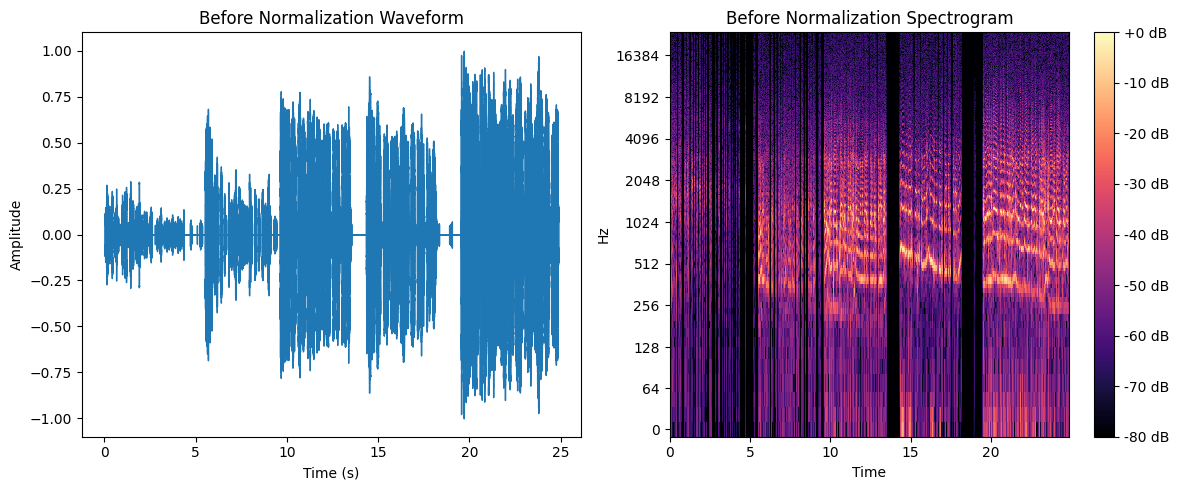

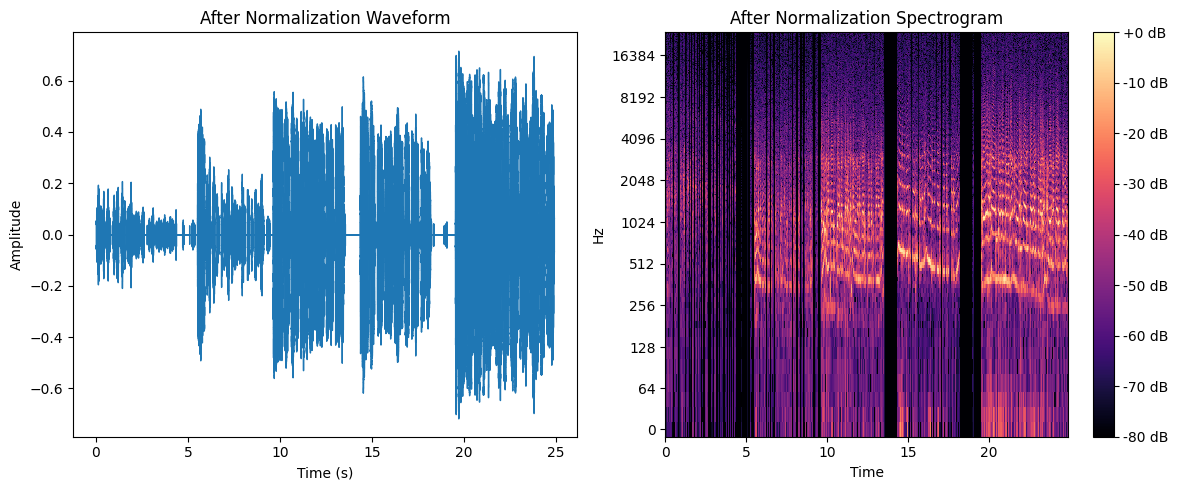

In [22]:
from pathlib import Path
import librosa
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa.display

base_dir = Path.cwd()
input_path = base_dir / "data" / "audio_chipmunk_processed.wav"
output_path = base_dir / "data" / "audio_chipmunk_loudness16LUFS.wav"

y, sr = librosa.load(str(input_path), sr=None)

target_dbfs = -16.0

rms = np.sqrt(np.mean(y**2))
current_db = 20 * np.log10(rms + 1e-9)

gain_db = target_dbfs - current_db
gain = 10**(gain_db / 20)

y_normalized = y * gain

sf.write(str(output_path), y_normalized, sr)
print(f"Audio chipmunk dengan pendekatan -16 LUFS disimpan di: {output_path}")

def plot_waveform_and_spectrogram(y, sr, title_prefix):
    plt.figure(figsize=(12, 5))

    # Waveform
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"{title_prefix} Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    # Spectrogram
    plt.subplot(1, 2, 2)
    D = np.abs(librosa.stft(y))
    DB = librosa.amplitude_to_db(D, ref=np.max)
    librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"{title_prefix} Spectrogram")
    
    plt.tight_layout()
    plt.show()

plot_waveform_and_spectrogram(y, sr, "Before Normalization")

plot_waveform_and_spectrogram(y_normalized, sr, "After Normalization")


### Penjelasan

**– Perubahan dinamika suara yang terjadi**  
Perubahan dinamika suara terlihat pada waveform dan spectrogram. Pada waveform sebelum normalisasi, amplitudo audio lebih besar mencapai ±1.0. Setelah normalisasi, amplitudo berkurang secara hingga ±0.7, sehingga seluruh sinyal audio berada pada level target RMS (-16 dBFS). Pada spectrogram, pola frekuensi dan noise tetap sama, namun intensitas kenyaringan menurun di detik kurang lebih 4-5.

**– Perbedaan antara normalisasi peak dan normalisasi LUFS**  
Peak Normalization digunakan ketika tujuan utama adalah mencegah distorsi digital atau clipping. Metode ini cocok untuk produksi atau pra-mixing audio, serta untuk pengarsipan file audio agar level puncaknya tetap aman. Sedangkan Loudness Normalization digunakan untuk menjaga konsistensi kenyaringan suara yang didengar pendengar. Metode ini lebih tepat untuk mastering audio yang akan diputar di platform streaming, podcast, radio, atau televisi, sehingga semua bagian audio terdengar seimbang dan nyaman di telinga.

**– Bagaimana kualitas suara berubah setelah proses normalisasi dan loudness optimization**  
Setelah normalisasi dan pengoptimalan loudness, kualitas suara menjadi lebih terdengar, pada bagian tertentu kualitas suara menjadi lebih terdengar dibandingkan sebelumnya untuk awal sama saja.

**– Kelebihan dan kekurangan dari pengoptimalan loudness dalam konteks rekaman suara**  
Kelebihan pengoptimalan loudness meliputi volume yang konsisten sehingga memudahkan pendengar, meningkatkan kejelasan ucapan, pemenuhan standar (-16 LUFS untuk podcast atau -23 LUFS untuk TV), pencegahan clipping jika dilakukan dengan benar, serta peningkatan kualitas audio di berbagai perangkat. Kekurangannya antara lain potensi mengurangi dinamika asli audio sehingga terdengar “flat”, risiko over-compression jika digabung dengan kompresi agresif, noise rendah yang ikut terdengar lebih jelas, kebutuhan analisis LUFS yang akurat agar audio tidak terlalu pelan atau keras, dan tetap memerlukan editing manual untuk menjaga kualitas vokal atau instrumen penting.


---

## Soal 5: Music Analysis dan Remix

### 5.A Deteksi tempo dan estimasi kunci dari masing-masing lagu

In [26]:
import librosa
import numpy as np
from pathlib import Path

base_dir = Path.cwd()
input1 = base_dir / "data" / "lagu1.wav"
input2 = base_dir / "data" / "lagu2.wav"

key_names = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']

def analyze_song(path):
    y, sr = librosa.load(str(path), sr=None)
    
    # Deteksi tempo (BPM) → pastikan float
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    tempo = float(tempo)
    
    # Estimasi key sederhana
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
    key_index = int(np.argmax(np.sum(chroma, axis=1)))
    key = key_names[key_index]
    
    # Durasi
    duration = float(librosa.get_duration(y=y, sr=sr))
    
    return tempo, key, duration

tempo1, key1, dur1 = analyze_song(input1)
tempo2, key2, dur2 = analyze_song(input2)

print(f"Lagu 1 → Tempo: {tempo1:.1f} BPM, Key: {key1}, Durasi: {dur1:.1f} detik")
print(f"Lagu 2 → Tempo: {tempo2:.1f} BPM, Key: {key2}, Durasi: {dur2:.1f} detik")


C:\Users\acerl\AppData\Local\Temp\ipykernel_24600\2067575895.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tempo = float(tempo)


Lagu 1 → Tempo: 181.5 BPM, Key: B, Durasi: 59.9 detik
Lagu 2 → Tempo: 92.2 BPM, Key: C, Durasi: 53.6 detik


#### Penjelasan Singkat

- **Perbandingan Tempo:**  
  Lagu 1 lebih cepat dengan tempo **181.5 BPM**, sedangkan Lagu 2 lebih lambat dengan tempo **92.2 BPM**.

- **Dominasi Kunci (Key):**  
  Lagu 1 dominan di **key B**, sedangkan Lagu 2 dominan di **key C**.  

### 5.B Proses Remix

In [42]:
from pathlib import Path
import librosa
import numpy as np
import soundfile as sf
base_dir = Path.cwd()
input1 = base_dir / "data" / "lagu1.wav"
input2 = base_dir / "data" / "lagu2.wav"
output_file = base_dir / "data" / "lagu_remix.wav"

crossfade_sec = 4  
offset_sec = 4          
end_trim_sec = 2         
key_names = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']


def analyze_song(path):
    y, sr = librosa.load(str(path), sr=None)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    tempo = float(tempo)
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
    key_index = int(np.argmax(np.sum(chroma, axis=1)))
    key = key_names[key_index]
    duration = float(librosa.get_duration(y=y, sr=sr))
    return y, sr, tempo, key, duration


def semitone_shift(key_from, key_to):
    idx_from = key_names.index(key_from)
    idx_to = key_names.index(key_to)
    return idx_to - idx_from

def time_stretch(y, tempo_from, tempo_to):
    rate = tempo_to / tempo_from
    return librosa.effects.time_stretch(y=y, rate=rate)

def pitch_shift(y, sr, n_steps):
    return librosa.effects.pitch_shift(y=y, sr=sr, n_steps=n_steps)


y1, sr1, tempo1, key1, dur1 = analyze_song(input1)
y2, sr2, tempo2, key2, dur2 = analyze_song(input2)

# --- Tentukan durasi crossfade dan offset ---
crossfade_samples = int(sr1 * crossfade_sec)
offset_samples = int(sr2 * offset_sec)
end_trim_samples = int(sr1 * end_trim_sec)

crossfade_samples = min(crossfade_samples, len(y1)-end_trim_samples, len(y2)-offset_samples)

# --- Ambil bagian transisi ---
y1_end = y1[-(crossfade_samples + end_trim_samples):-end_trim_samples]
y2_start = y2[offset_samples : offset_samples + crossfade_samples]
y2_rest = y2[offset_samples + crossfade_samples :]

# --- Time Stretch hanya di transisi ---
tempo_crossfade = (tempo1 + tempo2)/2
y1_end_stretch = time_stretch(y1_end, tempo1, tempo_crossfade)
y2_start_stretch = time_stretch(y2_start, tempo2, tempo_crossfade)

# --- Pitch Shift hanya di transisi ---
shift1 = semitone_shift(key1, key2)
y1_end_shift = pitch_shift(y1_end_stretch, sr1, shift1)
y2_start_shift = pitch_shift(y2_start_stretch, sr1, 0)

# --- Samakan panjang array crossfade ---
min_len = min(len(y1_end_shift), len(y2_start_shift))
y1_end_shift = y1_end_shift[:min_len]
y2_start_shift = y2_start_shift[:min_len]

# --- Crossfade ---
crossfade_audio = np.zeros(min_len)
for i in range(min_len):
    fade_out = (min_len - i)/min_len
    fade_in  = i/min_len
    crossfade_audio[i] = y1_end_shift[i]*fade_out + y2_start_shift[i]*fade_in

# --- Gabungkan hasil akhir ---
output_audio = np.concatenate([
    y1[:-(crossfade_samples + end_trim_samples)],
    crossfade_audio,                      
    y2_rest                              
])


# --- Simpan hasil ---
sf.write(output_file, output_audio, sr1)
print(f"Remix dengan crossfade, offset {offset_sec}s, dan trim akhir {end_trim_sec}s selesai, tersimpan di {output_file}")


C:\Users\acerl\AppData\Local\Temp\ipykernel_24600\2583607719.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tempo = float(tempo)


Remix dengan crossfade, offset 4s, dan trim akhir 2s selesai, tersimpan di e:\KIKI\MULMED\Worksheet4\data\lagu_remix.wav


#### Penjelasan 

**Parameter Utama**
- `input1`, `input2` → Path file audio lagu 1 dan lagu 2.  
- `output_file` → File hasil remix.  
- `crossfade_sec` → Durasi crossfade antara lagu 1 dan 2 (dalam detik).  
- `offset_sec` → Posisi awal lagu 2 untuk memulai transisi (dalam detik).  
- `end_trim_sec` → Bagian akhir lagu 1 yang akan di-trim sebelum crossfade (dalam detik).  
- `key_names` → Daftar nama nada untuk deteksi kunci lagu (`C`, `C#`, `D`, …, `B`).  

**Langkah-Langkah**

1. **Analisis Lagu**
   - Menghitung **tempo** (BPM) dan **key** (nada dasar) dari tiap lagu.
   - Mengambil **durasi** dan fitur **chroma** untuk menentukan nada dominan.

2. **Hitung Perubahan Nada dan Tempo**
   - `semitone_shift` → Jumlah semitone untuk menyamakan nada lagu.
   - `time_stretch` → Menyesuaikan tempo crossfade agar lagu terdengar serasi.

3. **Ambil Bagian Transisi**
   - Dari lagu 1: ambil **akhir lagu sebelum trim** untuk dicampur.
   - Dari lagu 2: ambil **bagian awal setelah offset** untuk dicampur.
   - `y2_rest` → Bagian sisa lagu 2 setelah crossfade.

4. **Time-Stretch dan Pitch-Shift**
   - Hanya diterapkan pada **bagian transisi** untuk menyesuaikan tempo dan nada.
   - `y1_end_shift` → Bagian akhir lagu 1 yang sudah di-stretch dan di-pitch-shift.
   - `y2_start_shift` → Bagian awal lagu 2 yang di-stretch (nada tidak diubah).

5. **Crossfade**
   - Campur kedua audio menggunakan **fade out** untuk lagu 1 dan **fade in** untuk lagu 2.
   - Hasilnya terdengar **transisi halus** tanpa hentakan.

6. **Gabungkan Audio**
   - Audio akhir = Lagu 1 (sisa) + crossfade + sisa lagu 2.

7. **Simpan Hasil**
   - Format WAV, menggunakan **sample rate** dari lagu pertama.

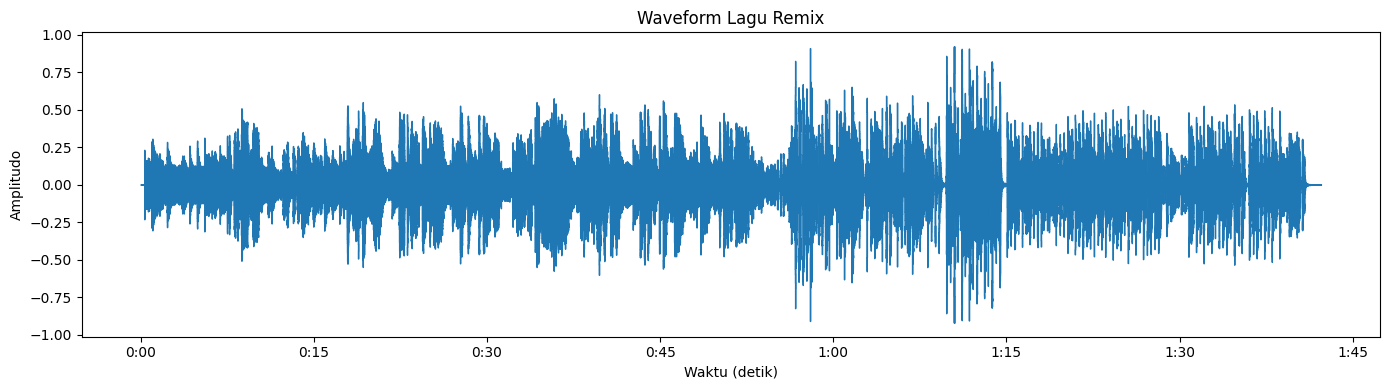

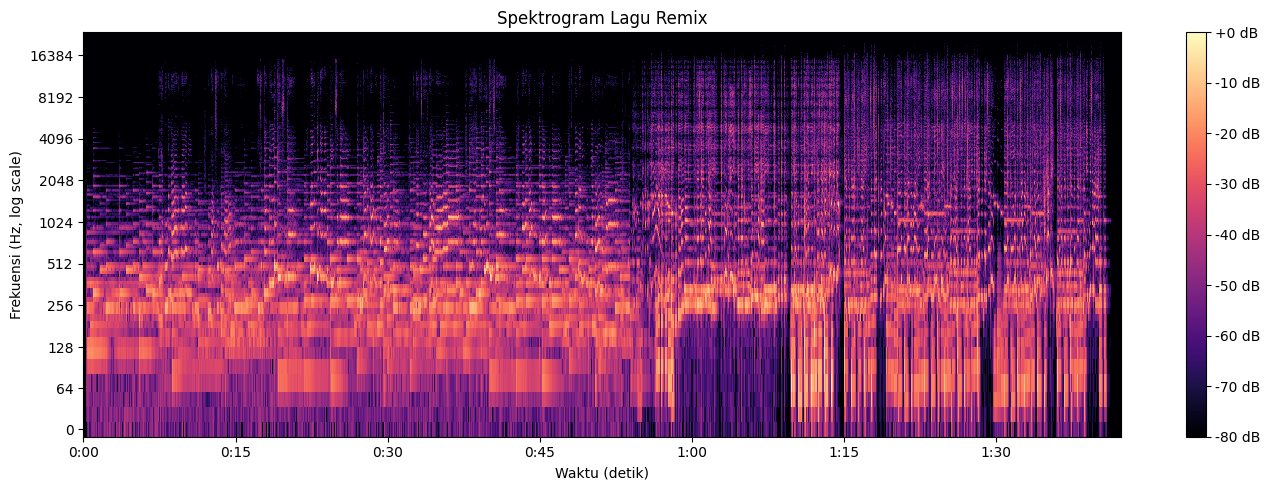

In [44]:
import librosa.display
import matplotlib.pyplot as plt
from pathlib import Path
import librosa
import numpy as np

# --- Load audio hasil remix ---
base_dir = Path.cwd()
remix_file = base_dir / "data" / "lagu_remix.wav"
y, sr = librosa.load(remix_file, sr=None)

# --- Tampilkan waveform ---
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform Lagu Remix")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.tight_layout()
plt.show()

# --- Tampilkan spektrogram ---
# Hitung STFT
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title("Spektrogram Lagu Remix")
plt.xlabel("Waktu (detik)")
plt.ylabel("Frekuensi (Hz, log scale)")
plt.tight_layout()
plt.show()

#### Penjelasan

1. Waveform
- Amplitudo audio terlihat **merata sepanjang lagu**, dengan puncak lebih tinggi pada bagian transisi.
- **Bagian transisi (kurang dari 1 menit)** menunjukkan amplitudo yang halus, menandakan **crossfade mencampur kedua lagu**.
- Tidak terlihat hentakan atau lonjakan tiba-tiba ketika transisi

2. Spektrogram
- **Bagian transisi (kurang dari 1 menit)**:
  - Perubahan pola frekuensi, mencerminkan **penyesuaian pitch dan tempo**.
  - Tidak ada frekuensi ekstrem yang menonjol, menunjukkan **percampuran nada yang sesuai**.
- **Bagian awal dan akhir lagu** terlihat stabil, menandakan **trim akhir dan offset bekerja dengan baik**.


---

## Refrensi

[link ChatGPT](https://chatgpt.com/share/68ef768d-17fc-8006-8525-0c19d39d77be)<br>
[Repositori Github](https://github.com/Alfariz11/Sistem-Teknologi-Multimedia)

---